In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Commercial Pricing.xlsx")

In [3]:
df.head()

,Month,Channel,Customer Age,Customer Month Of Birth,Customer Marital Status,Customer Occupation Status,Policy Annual Mileage,Policy Legal Cover,Vehicle Fuel Type,Vehicle Colour,Price Point,Customer Price,Purchase Flag
0,9,Comparison Site,43,1,Partnered,Employed,7999,Yes,Diesel,Grey,Higher,1020.63,1
1,8,Comparison Site,57,4,Single,Employed,6000,Yes,Petrol,Grey,Base,287.94,1
2,8,Telesales,83,11,Married,Retired,11000,Yes,Diesel,Blue,Lower,858.24,1
3,8,Comparison Site,52,8,Married,Employed,14000,No,Diesel,Blue,Base,382.15,1
4,9,Telesales,69,1,Single,Retired,3000,Yes,Petrol,Blue,Higher,376.22,1


### 1.	Data cleaning

In [4]:
df.isna().sum()

Month                          0
Channel                        0
Customer Age                   0
Customer Month Of Birth        0
Customer Marital Status        0
Customer Occupation Status     0
Policy Annual Mileage          0
Policy Legal Cover             0
Vehicle Fuel Type              0
Vehicle Colour                 0
Price Point                    0
Customer Price                16
Purchase Flag                  0
dtype: int64

In [5]:
df = df.dropna()

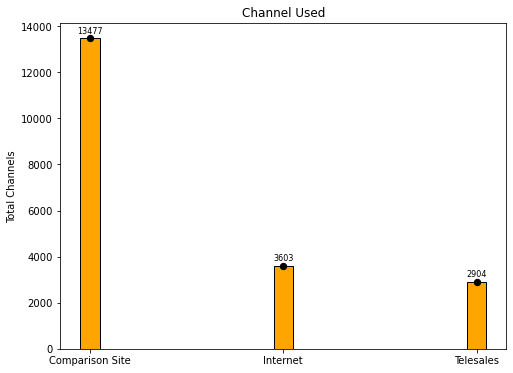

In [6]:
plt.figure(figsize = (8,6))

group = df.groupby('Channel')['Channel'].count()
ax = plt.bar(group.index,group.values, color = 'orange', edgecolor = 'black', width = 0.1)
plt.scatter(group.index,group.values, color = 'black', s=40)
plt.bar_label(ax, padding=3, fontsize=8)
plt.title("Channel Used")
plt.ylabel("Total Channels")
plt.xticks() 
plt.show()

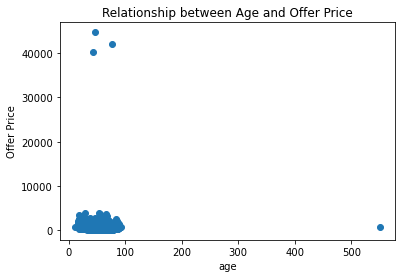

In [7]:
plt.scatter(df['Customer Age'], df['Customer Price'])
plt.title("Relationship between Age and Offer Price")
plt.xlabel("age")
plt.ylabel("Offer Price")
plt.show()

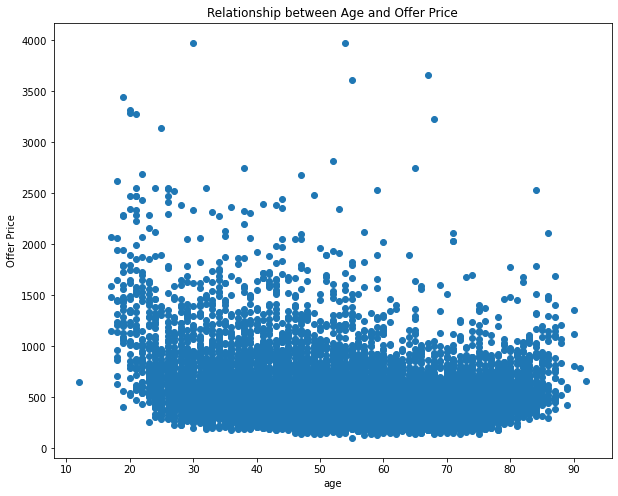

In [8]:
plt.figure(figsize = (10,8))
dfAge = df[df['Customer Age']<100] 
dfAge = dfAge[dfAge['Customer Price']<5000]
plt.scatter(dfAge['Customer Age'], dfAge['Customer Price'])
plt.title("Relationship between Age and Offer Price")
plt.xlabel("age")
plt.ylabel("Offer Price")
plt.show()

### 2.	Data analysis

#### Conversion rate 

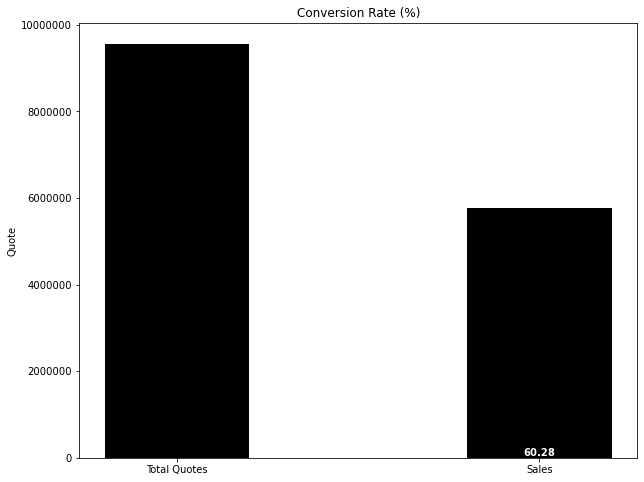

In [9]:
PercentConversion = df['Customer Price'].sum()
dfSales = df[df['Purchase Flag']==1]
Sales = dfSales['Customer Price'].sum()
Change = list(['Total Quotes', 'Sales'])
SaleList = list([PercentConversion, Sales])
plt.figure(figsize = (10,8))
plt.bar(Change, SaleList, color ='k',width = 0.4)

ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)

# add value on top of the bar at index 1
bar_index = 1
bar_value = round((Sales/PercentConversion)*100,2)

plt.text(bar_index, bar_value+0.5, str(bar_value), color='white', fontweight='bold', ha='center', va='bottom')
plt.title("Conversion Rate (%)")
plt.ylabel("Quote")
plt.show()

60.28 is the Conversion rate

#### Average customer price split by price point

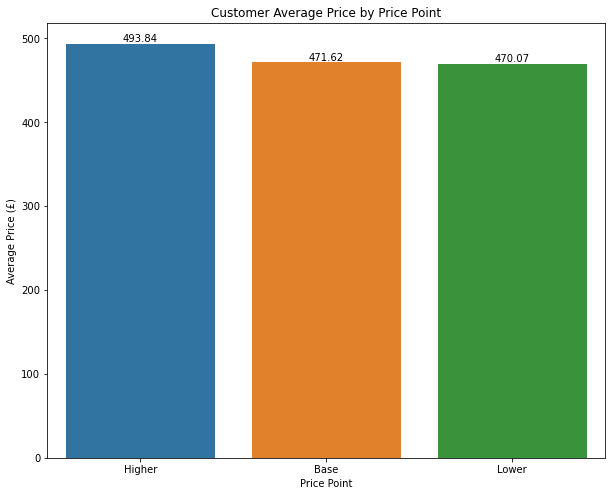

In [10]:
plt.figure(figsize = (10,8))
gorupby = df.groupby('Price Point')['Customer Price'].mean()
gorupby = gorupby.sort_values(ascending = False)
sns.barplot(gorupby.index, gorupby.values)
values = list(gorupby.values)
for i, value in enumerate(values):
    plt.text(i, value, str(round(value,2)), ha='center', va='bottom')

plt.title("Customer Average Price by Price Point")
plt.ylabel("Average Price (£)")
    
plt.show()

### Comparison of Average Age of Customers who accept or reject offer

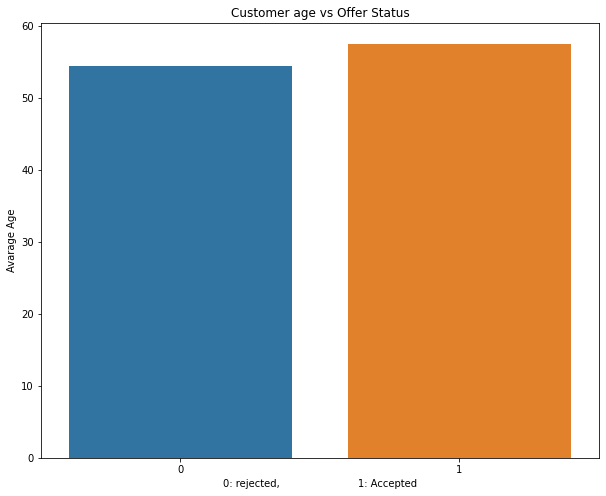

In [11]:
plt.figure(figsize = (10,8))
gorupby = df.groupby('Purchase Flag')['Customer Age'].mean()
sns.barplot(gorupby.index, gorupby.values)
plt.title("Customer age vs Offer Status")
plt.xlabel("0: rejected,                         1: Accepted")
plt.ylabel("Avarage Age")
plt.show()

### Relaitonship of Conversion rate and Customer Accupation Status 

In [12]:
Index = list(df.groupby('Customer Occupation Status')['Purchase Flag'].count().index)
TotalOffered = list(df.groupby('Customer Occupation Status')['Purchase Flag'].count().values)
TotalSales = list(dfSales.groupby('Customer Occupation Status')['Purchase Flag'].count().values)

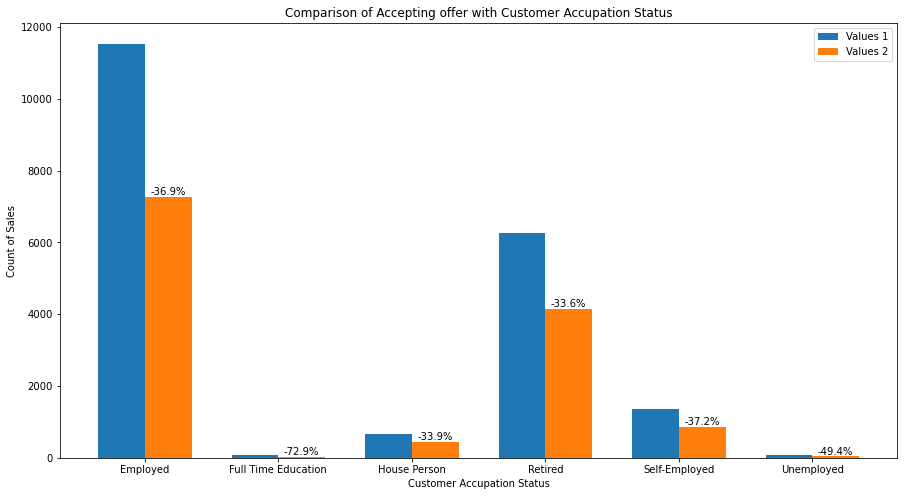

In [14]:
plt.figure(figsize = (15,8))
bar_width = 0.35
bar1 = plt.bar(range(len(Index)), TotalOffered, bar_width)
bar2 = plt.bar([i + bar_width for i in range(len(Index))], TotalSales, bar_width)

plt.xticks([i + bar_width/2 for i in range(len(Index))], Index)
plt.legend([bar1, bar2], ['Values 1', 'Values 2'])


for i in range(len(Index)):
    value1 = TotalOffered[i]
    value2 = TotalSales[i]
    difference = (value2 - value1) / value1 * 100
    text = '{:.1f}%'.format(difference)
    
    x = i + bar_width
    y = value2 + 1
    plt.text(x, y, text, ha='center', va='bottom')

plt.title("Comparison of Accepting offer with Customer Accupation Status")
plt.xlabel("Customer Accupation Status")
plt.ylabel("Count of Sales")
plt.show()